 ## Data Challenge (Part 2) - Data Analysis using Python

Given the json file, I want to learn the analysis in Python utilizing different libraries

In [211]:
import pandas as pd
import datetime as dt
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [229]:
#The first step is convert the data in json format into pandas dataframe
raw_data = pd.read_json('/Users/adrija/Downloads/analyst_take_home/logins.json')

In [230]:
df = pd.DataFrame(raw_data)

In [231]:
#Taking a look at the first five rows of the dataset
df.head()

,0
0,2012-03-01T00:05:55+00:00
1,2012-03-01T00:06:23+00:00
2,2012-03-01T00:06:52+00:00
3,2012-03-01T00:11:23+00:00
4,2012-03-01T00:12:47+00:00


In [232]:
#I would like to manipulate the dataset in order for me to develop the graph and the regression model
df.rename(columns={0: 'Timestamp'}, inplace=True)
df.head()

,Timestamp
0,2012-03-01T00:05:55+00:00
1,2012-03-01T00:06:23+00:00
2,2012-03-01T00:06:52+00:00
3,2012-03-01T00:11:23+00:00
4,2012-03-01T00:12:47+00:00


In [236]:
df.dtypes

Timestamp    object
dtype: object

In [237]:
#Since the dtype is object, we need to convert it into timestamp
df['Timestamp'] = pd.to_datetime(df.Timestamp)

In [238]:
#Now checking the new data types
df.dtypes

Timestamp    datetime64[ns]
dtype: object

In [239]:
#taking a quick look at the data set
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22447 entries, 0 to 22446
Data columns (total 1 columns):
Timestamp    22447 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 350.7 KB


In [245]:
#Since we are going to do hourly analysis of client logins, the next step would be to extract the hours.
df['Hours'] = df.Timestamp.dt.hour

In [246]:
#Now we need to find the frequency of the client logins in particular hours of the day. Please note that here 0 means 
#the first hour and 23 means the 24th hour.
New_group = df.groupby(["Hours"])['Hours'].count()

In [247]:
#checking the new group
New_group.head()

Hours
0    1667
1    1711
2    1911
3    1661
4    1235
Name: Hours, dtype: int64

In [248]:
#Converting the group by object into new dataframe
New_df = New_group.to_frame()

In [249]:
New_df.head()

,Hours
Hours,
0,1667
1,1711
2,1911
3,1661
4,1235


In [254]:
#Renaming the columns
New_df.rename(columns={'Hours': 'Client_Logins'}, inplace=True)

In [255]:
#Now we have the dat ready to run the analysis
New_df.head()

,Client_Logins
Hours,
0,1667
1,1711
2,1911
3,1661
4,1235


In [256]:
#Specifying the X and Y values we have a bar chart showing the frequency of client logins during different hours of
#the day
X_axis = New_df.index
Y_axis = New_df.Client_Logins

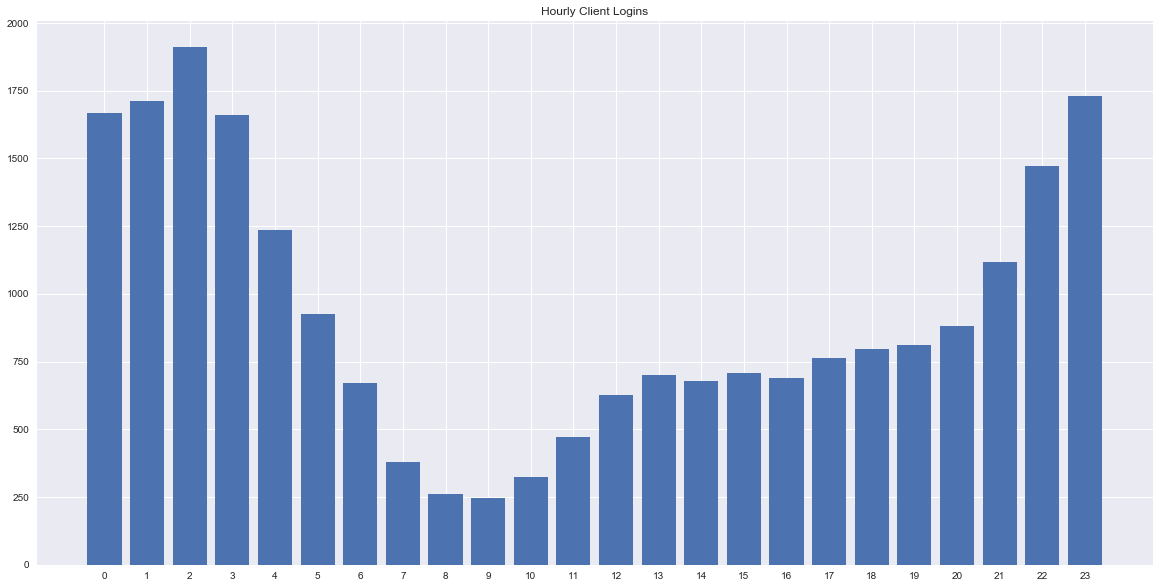

In [257]:
plt.rc('figure', figsize=(20, 10))
plt.bar(X_axis, Y_axis)
plt.xticks(X_axis)
plt.title('Hourly Client Logins')
plt.show()




In [ ]:
#The graph above shows the client login behavior across different hours of the day for the month of March 2017 through
#April 2017. Interestingly, the client logins opens up at the 0th hour (12 midnight) reaching its peak at the 2nd hour and then 
#declining at a faster rate to reach its lowest point at the 9th hour but picking up again after the 10th hour.
#Overall, the growth in the number of logins have been constant with slight movements until picking up again 
#after the 20th hour. What this essentially tells us is that the number of logins are lower during the morning through
#the day but it picks up in the evening and increases steadily in the late nights through midnights.

In [339]:
def best_fit_slope(X,Y):
    m = (((np.mean(X)*np.mean(Y)) - np.mean(Y*X)) /
         ((np.mean(X)*np.mean(X)) - np.mean(X*X)))
    b = np.mean(Y) - m*np.mean(X)
    return m, b

m, b = best_fit_slope(X, Y)
print(m, b)


(-12.827391304347803, 1082.8066666666664)


In [341]:
regression_line = [(m*x)+b for x in X]


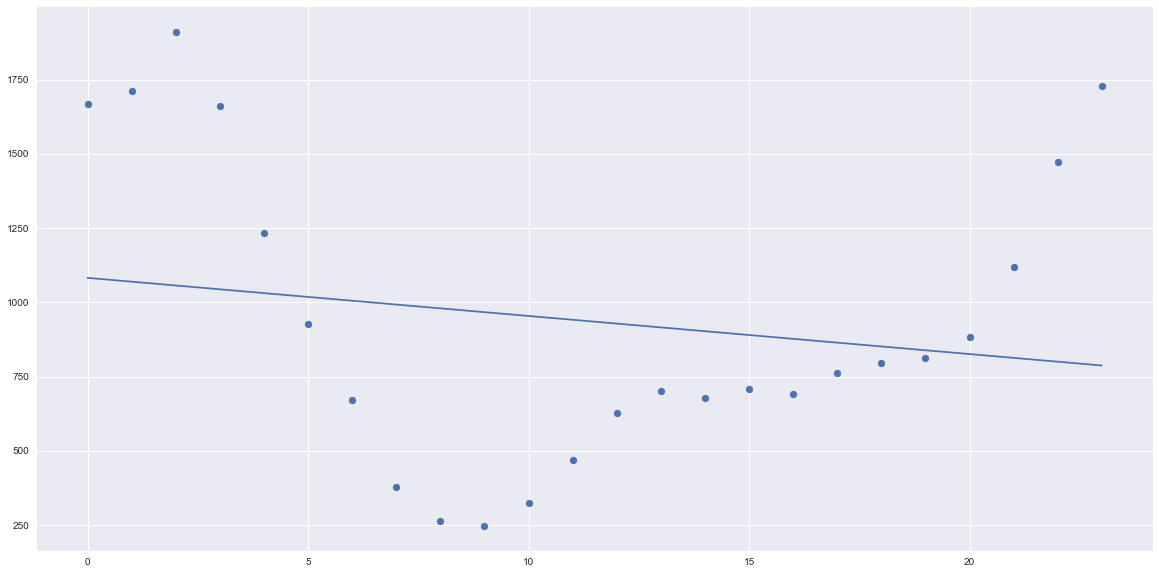

In [345]:
plt.scatter(X,Y)
plt.plot(X, regression_line)
plt.show()

In [ ]:
#To plot the line of best fit we need to specify the X and Y values and then write a function to predict the Ys.
#The metric or the score here to determine the quality of the model would be R**2, which we will derive after fitting
#the model.


def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
   
    
    return m, b

In [343]:
def calculate_yhat(X, b0, b1):
    return b0 + b1*X

In [344]:
def calculate_r2(Y, Y_hat):
    err_total = (Y-np.mean(Y))**2
    err_resid = (Y - Y_hat)**2
    ss_total = np.sum(err_total)
    ss_resid = np.sum(err_resid)
    return 1 - (ss_resid/ss_total)

Y_hat = calculate_yhat(X, b, m)
print 'Regression R2:', calculate_r2(Y, Y_hat)
print 'Baseline R2:', calculate_r2(Y, np.mean(Y))

Regression R2: 0.0318209207176
Baseline R2: 0.0


In [ ]:
#As it is evident from the graph above that the linear regression model is not doing a good job in predicting 
# the client login behavior using the hour of the day information.
#The metric here R**2 is positive and though slightly better than the baseline R**2 (using the mean), 
#but given that a perfect score would be equal to 1 this is significantly underfitting.
# One possible solution could be to include additional explanatory variables in case there are multiple factors
#responsible for client login behavior.
# Also it looks like the relationship is not linear here. In this case, it may also be interesting to see if we can use 
#a quadratic model to predict the client usage behavior better.

### Extra Credit Work

In [ ]:
#For the extra credit question I will do a weekly analysis of the client logins and carry out the same analysis.
#To name the dataframes I have used the prefix 'EC_' to distinguish extra credit work.

In [313]:
EC_df = pd.DataFrame(df)

In [314]:
EC_df['Week'] = df.Timestamp.dt.week

In [315]:
EC_df.head()

,Timestamp,Hours,Week
0,2012-03-01 00:05:55,0,9
1,2012-03-01 00:06:23,0,9
2,2012-03-01 00:06:52,0,9
3,2012-03-01 00:11:23,0,9
4,2012-03-01 00:12:47,0,9


In [316]:
EC_df.tail()

,Timestamp,Hours,Week
22442,2012-04-30 23:50:41,23,18
22443,2012-04-30 23:54:07,23,18
22444,2012-04-30 23:56:32,23,18
22445,2012-04-30 23:57:43,23,18
22446,2012-04-30 23:59:29,23,18


In [317]:
#Next we need to find the frequency of the client logins for each week

In [318]:
EC_New_group = EC_df.groupby(["Week"])['Week'].count()

In [319]:
EC_New_group

Week
9     1602
10    2200
11    2074
12    2351
13    2480
14    2258
15    2770
16    3314
17    3154
18     244
Name: Week, dtype: int64

In [320]:
EC_New_group.dtypes

dtype('int64')

In [321]:
EC_New_df = EC_New_group.to_frame()

In [322]:
EC_New_df.head()

,Week
Week,
9,1602
10,2200
11,2074
12,2351
13,2480


In [323]:
EC_New_df.rename(columns={'Week': 'Client_Logins'}, inplace=True)

In [324]:
EC_New_df.head()

,Client_Logins
Week,
9,1602
10,2200
11,2074
12,2351
13,2480


In [325]:
#Next, we need to specify the x and y axis and derive the graph

In [326]:
X_axis = EC_New_df.index
Y_axis = EC_New_df.Client_Logins


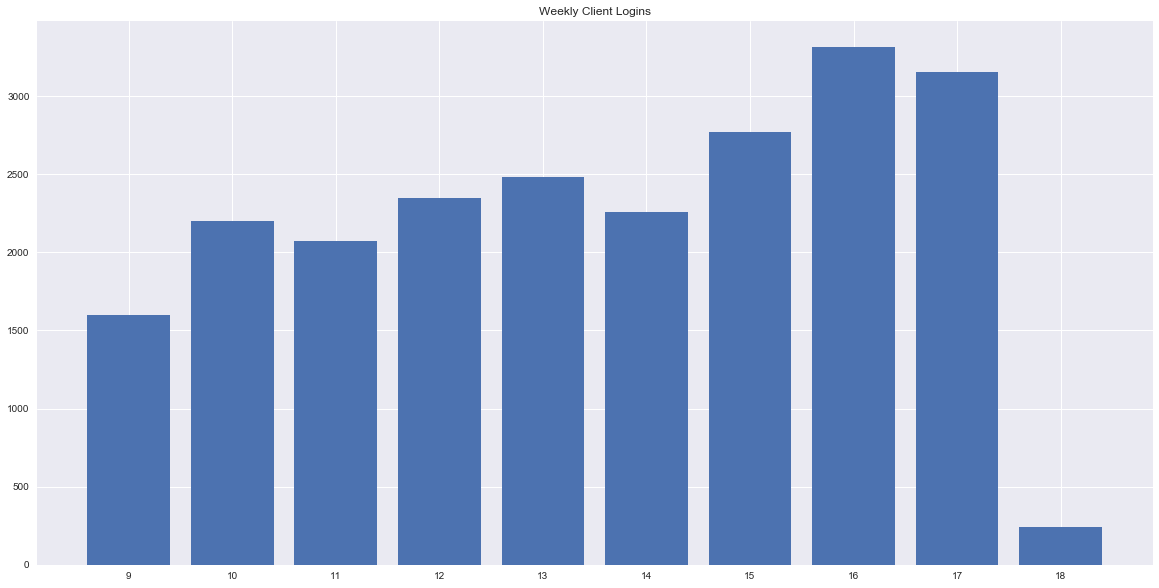

In [327]:
plt.rc('figure', figsize=(20, 10))
plt.bar(X_axis, Y_axis)
plt.xticks(X_axis)
plt.title('Weekly Client Logins')
plt.show()

In [ ]:
## The graph above shows the client login frequency over different weeks from March 2017 though April 2017. Overall
##the pattern of login behavior is fairly stable after week-9 except after week-14 it increases to its highest point 
##at week-16 and then drops significantly to reach its lowest point at week-18.

In [346]:
#To plot the line of best fit I have used the same function as above to plot the line and calculated the metric score.

X = EC_New_df.index
Y = EC_New_df.Client_Logins

In [347]:
def best_fit_slope(X,Y):
    m = (((np.mean(X)*np.mean(Y)) - np.mean(Y*X)) /
         ((np.mean(X)*np.mean(X)) - np.mean(X*X)))
    b = np.mean(Y) - m*np.mean(X)
    return m, b

m, b = best_fit_slope(X, Y)
print(m, b)


(10.248484848485202, 2106.3454545454497)


In [348]:
regression_line = [(m*x)+b for x in X]


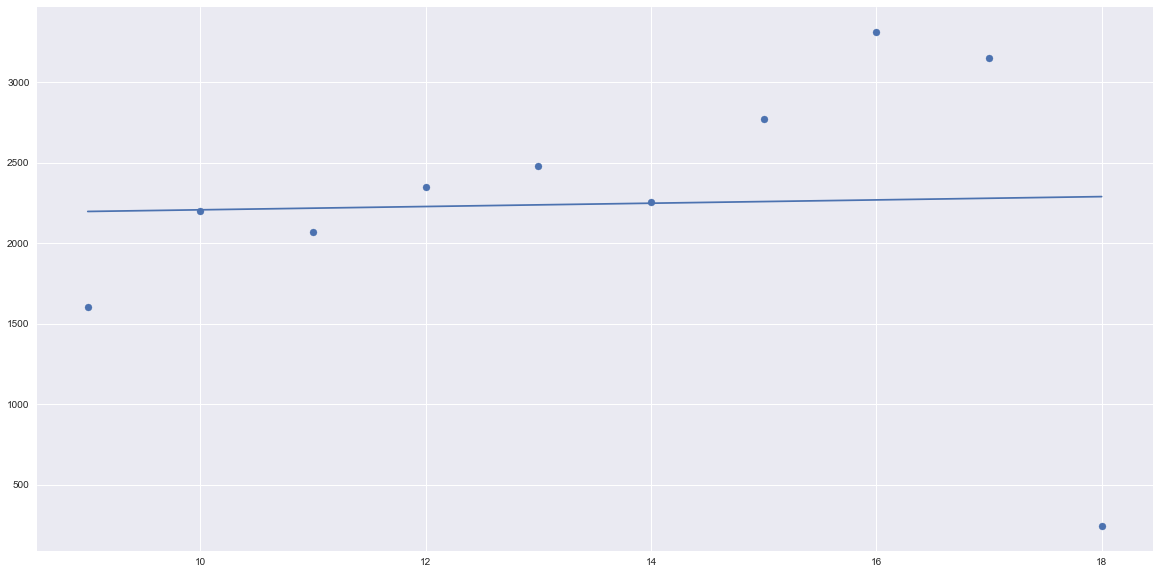

In [349]:
plt.scatter(X,Y)
plt.plot(X, regression_line)
plt.show()

In [350]:
def calculate_yhat(X, b0, b1):
    return b0 + b1*X

In [351]:
def calculate_r2(Y, Y_hat):
    err_total = (Y-np.mean(Y))**2
    err_resid = (Y - Y_hat)**2
    ss_total = np.sum(err_total)
    ss_resid = np.sum(err_resid)
    return 1 - (ss_resid/ss_total)

Y_hat = calculate_yhat(X, b, m)
print 'Regression R2:', calculate_r2(Y, Y_hat)
print 'Baseline R2:', calculate_r2(Y, np.mean(Y))

Regression R2: 0.00128181633571
Baseline R2: 0.0


In [ ]:
# As is evident from the graph above and the R**2 values the week of the given time period (week 9 through week 18)
#is doing a poor job in explaining the variation in client login behavior. 
#The R**2 though positive is almost the same as baseline R**2, both equal zero meaning the model is not able to explain
#anything.
#This analysis can be extended further by either transfering the linear model into other form (example loglinear)
#and /or by including other explanatory variables.